In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt

In [20]:


df = pd.read_csv('ML_Model\Dataset\bmi_train.csv')
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
  
df['Gender'].unique() 



array([1, 0])

In [21]:

X = df[['Height', 'Weight','Gender']]

X

,Height,Weight,Gender
0,174,96,1
1,189,87,1
2,185,110,0
3,195,104,0
4,149,61,1
...,...,...,...
495,150,153,0
496,184,121,0
497,141,136,0
498,150,95,1


In [22]:
df['BMI'] = df['Weight']/((df['Height']/100)**2)
df

,Gender,Height,Weight,Index,BMI
0,1,174,96,4,31.708284
1,1,189,87,2,24.355421
2,0,185,110,4,32.140248
3,0,195,104,3,27.350427
4,1,149,61,3,27.476240
...,...,...,...,...,...
495,0,150,153,5,68.000000
496,0,184,121,4,35.739603
497,0,141,136,5,68.407022
498,1,150,95,5,42.222222


In [23]:
overweight_threshold = 25
underweight_threshold = 18.5
def classify_bmi(bmi):
    if bmi >= overweight_threshold:
        return "Overweight"
    elif bmi < underweight_threshold:
        return "Underweight"
    else:
        return "Normal Weight"

# Apply the classification function to the DataFrame
df['Classification'] = df['BMI'].apply(classify_bmi)

y = df['Classification']
y 

0         Overweight
1      Normal Weight
2         Overweight
3         Overweight
4         Overweight
           ...      
495       Overweight
496       Overweight
497       Overweight
498       Overweight
499       Overweight
Name: Classification, Length: 500, dtype: object

In [24]:
y.unique()

array(['Overweight', 'Normal Weight', 'Underweight'], dtype=object)

In [25]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)




Accuracy: 0.96
               precision    recall  f1-score   support

Normal Weight       0.94      0.83      0.88        18
   Overweight       0.99      0.99      0.99        77
  Underweight       0.71      1.00      0.83         5

     accuracy                           0.96       100
    macro avg       0.88      0.94      0.90       100
 weighted avg       0.96      0.96      0.96       100



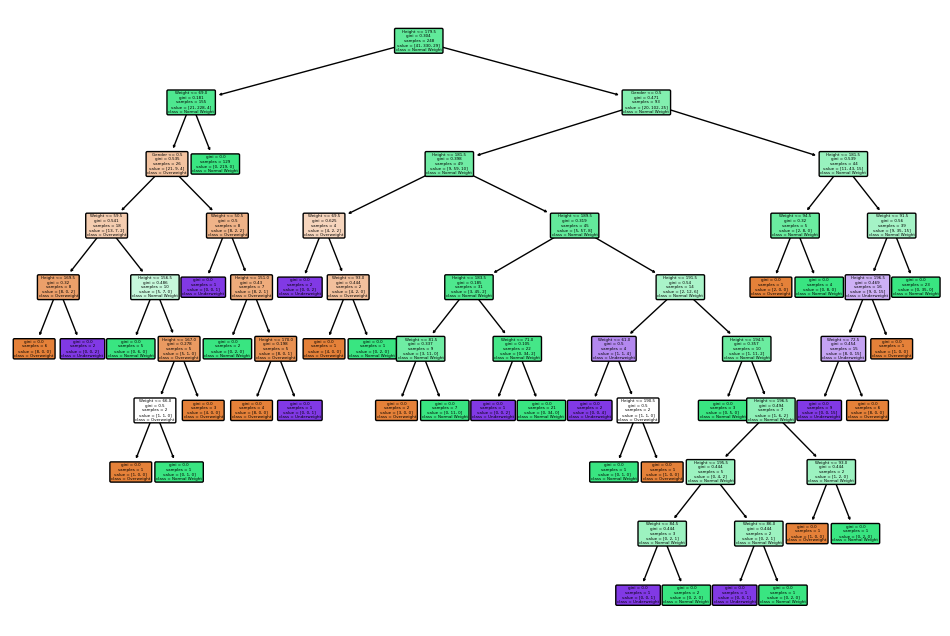

In [46]:
# Choose one of the decision trees within the ensemble
tree_to_plot = clf.estimators_[0]  # Change the index as needed

# Plot the selected decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_to_plot, filled=True, feature_names=['Height', 'Weight', 'Gender'], class_names=['Overweight', 'Normal Weight', 'Underweight'], rounded=True)
plt.show()

In [45]:
y.unique()

array(['Overweight', 'Normal Weight', 'Underweight'], dtype=object)

In [48]:
sample_data = [[174, 96, 1]]  
print(sample_data[0][1]/((sample_data[0][0]/100)**2))



31.708283789139912


In [49]:
prediction = clf.predict(sample_data)

# Print the predicted class
print(f"Predicted class: {prediction}")

Predicted class: ['Overweight']


c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}
Accuracy: 0.87
Precision: 0.8809880952380952
Recall: 0.87
F1 Score: 0.8702511388393741
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 15  1  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  2 23  5]
 [ 0  0  0  0  2 37]]


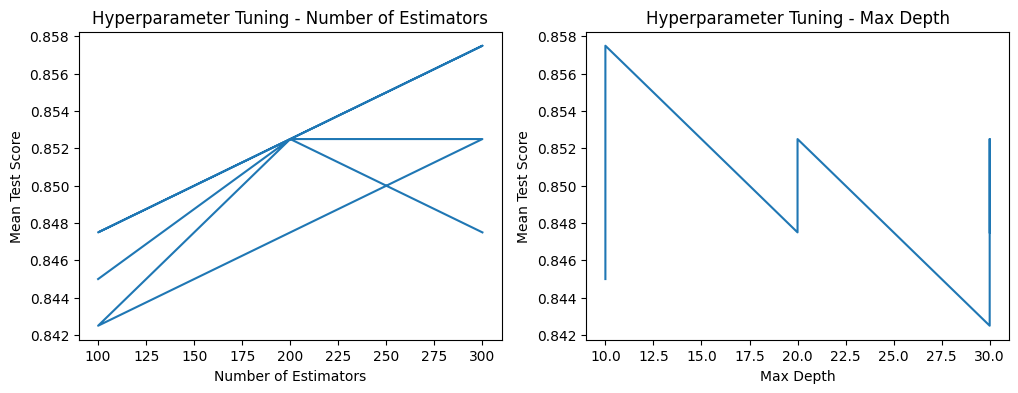

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the data into a DataFrame
data = pd.read_csv('Dataset/bmi_train.csv')  # Replace 'your_data.csv' with the actual CSV file path

# Preprocess the data
data.dropna(inplace=True)  # Remove rows with missing values
data['Index'] = data['Index'].astype(int)  # Ensure 'Index' is of integer type

# Split the data into features (X) and the target (y)
X = data[['Gender', 'Height', 'Weight']]
y = data['Index']

# Encode 'Gender' using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a RandomForestClassifier
clf = RandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    # Add other hyperparameters as needed
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot error and loss curves (for illustrative purposes, as RandomForest doesn't have a loss curve)
# Feel free to use other models if you want loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(grid_search.cv_results_['param_n_estimators'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning - Number of Estimators')

plt.subplot(1, 2, 2)
plt.plot(grid_search.cv_results_['param_max_depth'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning - Max Depth')

plt.show()


Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 15  1  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  2 23  5]
 [ 0  0  0  0  2 37]]
Accuracy: 0.87


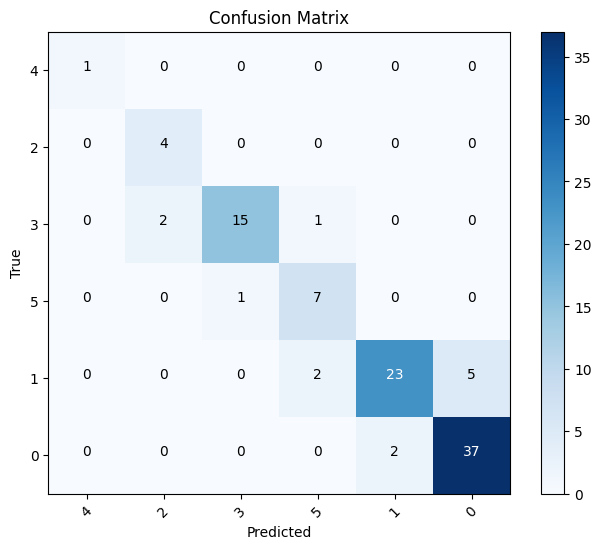

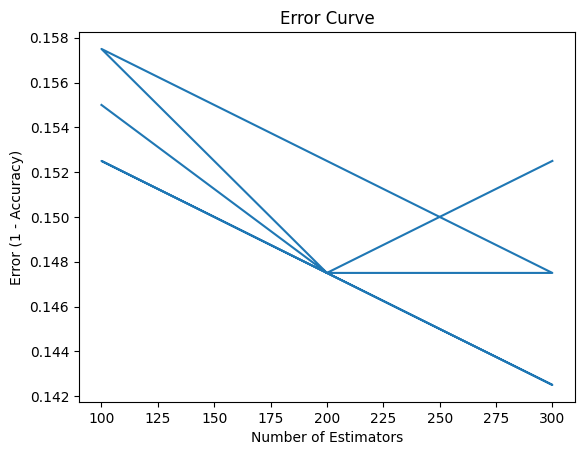

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load and preprocess the data as shown in the previous code example

# Fit the best model on the training data (best_model from GridSearchCV)
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = data['Index'].unique()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the error curve (for illustrative purposes, as RandomForest doesn't have a loss curve)
# Feel free to use other models if you want loss curves
plt.plot(grid_search.cv_results_['param_n_estimators'], 1 - grid_search.cv_results_['mean_test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Error Curve')
plt.show()


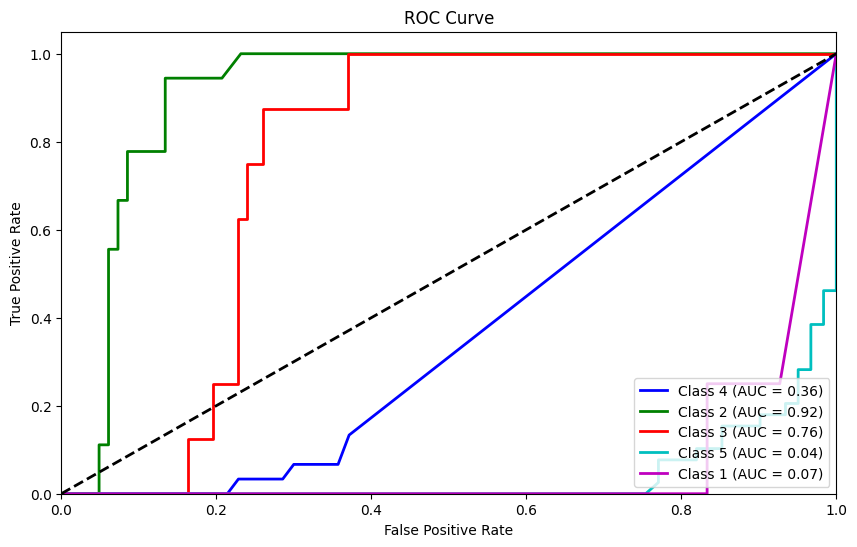

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Load and preprocess the data as shown in the previous code example

# Fit the best model on the training data (best_model from GridSearchCV)
best_model.fit(X_train, y_train)

# Predict probabilities for each class
y_prob = best_model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(classes)  # The number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == classes[i]).astype(int), y_prob[:, i])
    roc_auc[i] = roc_auc_score((y_test == classes[i]).astype(int), y_prob[:, i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
